In [1]:
from uniswappy import *
import time
import datetime
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
sim = ETHDenverSimulator(time_window = 3)
sim.init_lp(1000)

# --------------------
# INFINITE PROCESS
# --------------------
# sim.process()  

# --------------------
# RETRIEVE STATE DATA
# --------------------
# swap_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP)
# swap_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP)

# arb_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_ARB)
# arb_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_ARB)

# swap_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_SWAP)
# arb_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_ARB)

# swap_amt = sim.get_swap_amt()

In [3]:
x_amt_arr = []
y_amt_arr = []
lp_price_arr = []
tstamp_arr = []
swap_amt_arr = []
swap_tstamp_arr = []

N = 5
for k in range(N):
    sim.trial()
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_SWAP))
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))    
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP))
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_ARB))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_ARB))   
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_SWAP))
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_ARB))
    swap_tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))
    swap_amt_arr.append(sim.get_swap_amt())
    print(f"Trial {k}")   

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4


Text(0, 0.5, 'WETH Swap Amounts')

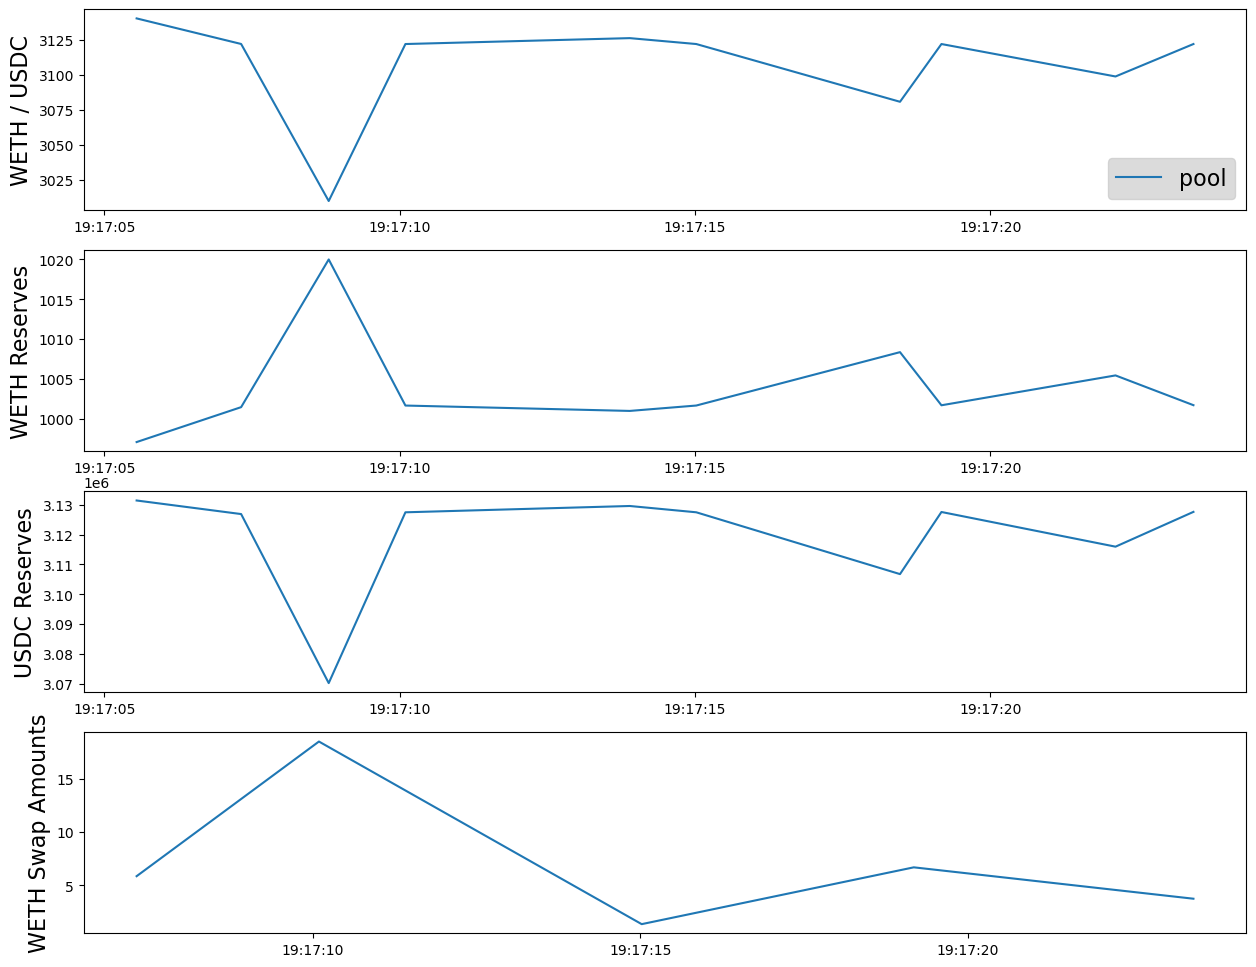

In [5]:
fig, (p_ax, tkn1_ax, tkn2_ax, s_ax) = plt.subplots(nrows=4, sharex=False, sharey=False, figsize=(15, 12))
p_ax.plot(tstamp_arr, lp_price_arr, label='pool')
p_ax.set_ylabel(f'{sim.get_x_tkn().token_name} / {sim.get_y_tkn().token_name}', fontsize=16)
p_ax.legend(fontsize=16, facecolor="lightgray", loc='lower right')

tkn1_ax.plot(tstamp_arr, x_amt_arr)
tkn1_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Reserves', fontsize=16)

tkn2_ax.plot(tstamp_arr, y_amt_arr)
tkn2_ax.set_ylabel(f'{sim.get_y_tkn().token_name} Reserves', fontsize=16)

s_ax.plot(swap_tstamp_arr, swap_amt_arr)
s_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Swap Amounts', fontsize=16)